In [4]:
from deepface import DeepFace

import os

import cv2
import matplotlib.pyplot as plt
import json

In [5]:
models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID", "ArcFace", "SFace"]
metrics = ["cosine", "euclidean", "euclidean_l2"]

ref_path = "before"
cmp_path = "after"

header_List =["file_x","file_y",
                  "VGG-Face_cosine","VGG-Face_cosine_verifie",
                  "VGG-Face_euclidean","VGG-Face_euclidean_verifie",
                  "VGG-Face_euclidean_l2","VGG-Face_euclidean_l2_verifie",
                  "Facenet_cosine","Facenet_cosine_verifie",
                  "Facenet_euclidean","Facenet_euclidean_verifie",
                  "Facenet_euclidean_l2","Facenet_euclidean_l2_verifie",
                  "Facenet512_cosine","Facenet512_cosine_verifie",
                  "Facenet512_euclidean","Facenet512_euclidean_verifie",
                  "Facenet512_euclidean_l2","Facenet512_euclidean_l2_verifie",
                  "OpenFace_cosine","OpenFace_cosine_verifie",
                  "OpenFace_euclidean","OpenFace_euclidean_verifie",
                  "OpenFace_euclidean_l2","OpenFace_euclidean_l2_verifie",
                  "DeepFace_cosine","DeepFace_cosine_verifie",
                  "DeepFace_euclidean","DeepFace_euclidean_verifie",
                  "DeepFace_euclidean_l2","DeepFace_euclidean_l2_verifie",
                  "DeepID_cosine","DeepID_cosine_verifie",
                  "DeepID_euclidean","DeepID_euclidean_verifie",
                  "DeepID_euclidean_l2","DeepID_euclidean_l2_verifie",
                  "ArcFace_cosine","ArcFace_cosine_verifie",
                  "ArcFace_euclidean","ArcFace_euclidean_verifie",
                  "ArcFace_euclidean_l2","ArcFace_euclidean_l2_verifie",
                  "SFace_cosine","SFace_cosine_verifie",
                  "SFace_euclidean","SFace_euclidean_verifie",
                  "SFace_euclidean_l2","SFace_euclidean_l2_verifie","total_verified"]


In [6]:
f = open(ref_path + "_" + cmp_path + "_compare.csv", "w", encoding="UTF-8")
f_master = open(ref_path + "_" + cmp_path + "_master.csv", "w", encoding="UTF-8")

data_list=[]

for i in range(0,50):
    f.write(header_List[i] +',')
f.write(header_List[50] + "\n")    

master_header = "file_x, file_y, total_verified" 
f_master.writelines(master_header)


ref_list = os.listdir(ref_path)
ref_list_jpg = [file for file in ref_list if file.endswith(".jpg")]
cmp_list = os.listdir(cmp_path)
cmp_list_jpg = [file for file in cmp_list if file.endswith(".jpg")]

for ref in ref_list_jpg:
    for cmp in cmp_list_jpg:
        print("Reference > " + ref)
        print("Compare > " + cmp)
        
        sum_value = 0
        data=[]
        data.append(ref_path + '/' + ref)
        data.append(cmp_path + '/' + cmp)
        for i in models:
            for j in metrics:
                result = DeepFace.verify(img1_path = ref_path + "/" + ref, img2_path = cmp_path + "/" + cmp, model_name = i, distance_metric = j)
                data.append(str(result['distance']))
                data.append(str(result['verified']))
                if((str(result['verified']))=='True'):
                    sum_value = 1 + sum_value
     
        for i in range(0,50):
            f.write(data[i] + ",")
        f_master.write(ref_path + "/" + ref + "," + cmp_path + "/" + cmp)

        if(sum_value>12):
            f.write("True" + '\n')
            f_master.writelines("True")
        elif(sum_value<=12):
            f.write("False"+'\n')
            f_master.writelines("False")
            
print("종료")      
f.close()

Reference > img1.jpg
Compare > img1.jpg


ValueError: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.

In [7]:
img_path = ref_path + "/img1.jpg"

There are  6  representations found in  representations_vgg_face.pkl
1/1 [==============================] - 1s 960ms/step
find function lasts  1.270355463027954  seconds


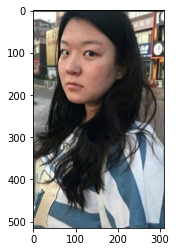

In [8]:
df = DeepFace.find(img_path = img_path, db_path = "cmp_db")
img = cv2.imread(ref_path + "/" + "img1.jpg")
plt.imshow(img[:,:,::-1])
# print(df)
for i in df['identity']:
    print(i)
    img = cv2.imread(i)
    plt.imshow(img[:,:,::-1])
    # print(i)

In [9]:
img_data = DeepFace.analyze(img_path)
img_data

Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 277ms/step


Action: age:  25%|█████████████████▊                                                     | 1/4 [00:00<00:01,  1.91it/s]

1/1 [==============================] - 1s 804ms/step


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:01<00:01,  1.17it/s]

1/1 [==============================] - 1s 852ms/step


Action: race:  75%|████████████████████████████████████████████████████▌                 | 3/4 [00:02<00:00,  1.11it/s]

1/1 [==============================] - 1s 813ms/step


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.15it/s]


{'emotion': {'angry': 4.349131768890128,
  'disgust': 8.622369825528282e-11,
  'fear': 0.010092530884707325,
  'happy': 4.957280179842486e-05,
  'sad': 1.5644802713084383,
  'surprise': 3.6696850525149885e-08,
  'neutral': 94.07624567009483},
 'dominant_emotion': 'neutral',
 'region': {'x': 239, 'y': 62, 'w': 54, 'h': 54},
 'age': 30,
 'gender': 'Man',
 'race': {'asian': 99.87254142001518,
  'indian': 0.022988882762182968,
  'black': 4.7780636697418055e-05,
  'white': 0.012437579439492042,
  'middle eastern': 1.5030406260650765e-06,
  'latino hispanic': 0.09198438458796648},
 'dominant_race': 'asian'}

In [50]:
img_data = DeepFace.analyze(img_path)
print(img_data['emotion'])
img = json.loads(img_data['emotion'])
print(img)
img = cv2.imread(img_path)
plt.imshow(img[:,:,::-1])

Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 18ms/step


Action: age:  25%|█████████████████▊                                                     | 1/4 [00:00<00:00,  7.82it/s]

1/1 [==============================] - 0s 242ms/step


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:00<00:00,  3.95it/s]

1/1 [==============================] - 0s 345ms/step


Action: race:  75%|████████████████████████████████████████████████████▌                 | 3/4 [00:00<00:00,  3.20it/s]

1/1 [==============================] - 0s 242ms/step


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.54it/s]


{'emotion': {'angry': 7.389172166585922,
  'disgust': 3.9521717098978115e-05,
  'fear': 2.0569493994116783,
  'happy': 4.934896528720856,
  'sad': 3.5197507590055466,
  'surprise': 0.007477643521269783,
  'neutral': 82.09171295166016},
 'dominant_emotion': 'neutral',
 'region': {'x': 273, 'y': 72, 'w': 248, 'h': 248},
 'age': 33,
 'gender': 'Man',
 'race': {'asian': 0.04228860198054463,
  'indian': 0.329063949175179,
  'black': 0.018716089834924787,
  'white': 68.5371458530426,
  'middle eastern': 17.82699227333069,
  'latino hispanic': 13.245794177055359},
 'dominant_race': 'white'}

In [10]:
for ref in ref_list_jpg:
    print(ref)
    for i in models:
        print(i)
        embedding = DeepFace.represent(img_path = ref_path + "/" + ref, model_name = i)
        print(embedding)

img1.jpg
VGG-Face
1/1 [==============================] - 0s 489ms/step
[-0.009393624030053616, -0.006306578870862722, 0.003339397022500634, 0.012501390650868416, -0.010367629118263721, 0.03374994918704033, 0.00642251456156373, 0.015079164877533913, 0.013857194222509861, 0.006182510405778885, 0.005730631295591593, 0.0018027148908004165, 0.01978219859302044, 0.019496912136673927, 0.019290393218398094, -0.005755475722253323, 0.02266240306198597, 0.013650896959006786, -0.00947635155171156, 0.009956380352377892, 0.01042049378156662, 0.01172652654349804, 0.023859098553657532, 0.008246462792158127, 0.01618337817490101, -0.004407831467688084, 0.01529643964022398, 0.011209527961909771, 0.011237140744924545, 0.009028710424900055, 0.019580241292715073, 0.008612691424787045, -0.009362693876028061, -0.002435270929709077, 0.02042323723435402, -0.0021511558443307877, 0.02712290920317173, 0.00922012235969305, 0.004751472733914852, 0.0045906733721494675, 0.016418030485510826, -0.011432270519435406, 0.0

Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: C:\Users\jgbon\.deepface\weights\facenet_weights.h5
100%|█████████████████████████████████████████████████████████████████████████████| 92.2M/92.2M [00:09<00:00, 9.59MB/s]


1/1 [==============================] - 3s 3s/step
[0.9290211200714111, -1.8829635381698608, 0.8132855892181396, -0.8221423029899597, 0.15273508429527283, -1.354508876800537, 1.0292109251022339, -0.6130015850067139, -0.938836395740509, -0.5375391244888306, 1.0307978391647339, -1.4671436548233032, 0.38881200551986694, 0.09744903445243835, 0.0009295642375946045, -0.6891251802444458, 1.592502236366272, -1.905867338180542, 0.23793187737464905, 0.35654571652412415, -1.8155583143234253, 0.5581320524215698, -0.8012312650680542, 0.7203715443611145, 1.133650302886963, 0.22689291834831238, 1.1560617685317993, 0.6796764135360718, 0.5574867725372314, -0.943766176700592, -0.04501817375421524, 0.5148742198944092, -0.7507941722869873, -1.4269570112228394, 0.0022012023255228996, 1.0164598226547241, -0.6480475068092346, 0.38148951530456543, 0.09860554337501526, -0.8647624254226685, 0.08597500622272491, 0.230232372879982, 1.1901686191558838, -0.01892761141061783, 0.1515667885541916, -1.059182047843933, 0

Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet512_weights.h5
To: C:\Users\jgbon\.deepface\weights\facenet512_weights.h5
100%|█████████████████████████████████████████████████████████████████████████████| 95.0M/95.0M [00:07<00:00, 12.5MB/s]


KeyboardInterrupt: 

In [ ]:
DeepFace.stream(db_path = "cmp_camera")

In [16]:
obj = DeepFace.analyze(img_path = ref_path + "/" + "img4.jpg")
obj

NameError: name 'ref_list_jpg' is not defined